In [ ]:
from google.colab import files
upload=files.upload()

Saving Data.csv to Data.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('Data.csv')

In [ ]:
print(data.shape)
print(data.size)

(10, 4)
40


In [ ]:
print(data.head(4))

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No


In [ ]:
print(data.info)

<bound method DataFrame.info of    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes>


In [ ]:
types=data.dtypes
print(types)

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object


In [ ]:
x=data.iloc[:,:-1].values
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
y=data.iloc[:,3].values
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
data.describe()

Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000

In [ ]:
class_count=data.groupby('Purchased').size()
print(class_count)

Purchased
No     5
Yes    5
dtype: int64


In [ ]:
correlation=data.corr(method='pearson')
print(correlation)

             Age    Salary
Age     1.000000  0.982495
Salary  0.982495  1.000000


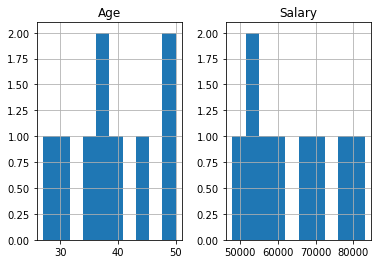

In [ ]:
import matplotlib.pyplot as py
from matplotlib import pyplot
data.hist()
py.show()


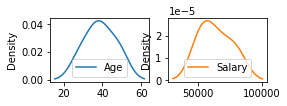

In [ ]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
py.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None,verbose=0)
imputer=imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hotencoder=preprocessing.OneHotEncoder(sparse=False)
x=one_hotencoder.fit_transform(x) 
print(x)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x=st_x.fit_transform(x)
print(x)

[[ 1.22474487 -0.65465367 -0.65465367 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333  3.         -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333  3.         -0.33333333 -0.33333333]
 [-0.81649658 -0.65465367  1.52752523  3.         -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333  3.         -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333]
 [-0.81649658  1.52752523 -0.65465367 -0.33333333  3.         -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333  3.         -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333]
 [-0.81649658 -0.65465367  1.52752523 -0.33333333 -0.33333333 -0.33333333
  -0.33333333  3.         -0.33333333 -0.33333333 -0.33333333 -0.333333

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 1.22474487 -0.65465367 -0.65465367 -0.33333333 -0.33333333  3.
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333  3.         -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333]
 [ 1.22474487 -0.65465367 -0.65465367 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333  3.         -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333  3.         -0.33333333 -0.33333333]
 [ 1.22474487 -0.65465367 -0.65465367 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333  3.
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333 -0.33333333 -0.33333333  3.         -0.33333333]
 [-0.81649658  1.52752523 -0.65465367 -0.33333333  3.         -0.33333333
  -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
  -0.33333333